<a href="https://colab.research.google.com/github/sota1111/DL_Zero/blob/main/DL_Zero1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os, sys
os.chdir('/content/drive/MyDrive/FromScratch')

In [ ]:
import numpy as np
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [ ]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

In [ ]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [ ]:
np.random.choice(60000,10)

array([35563, 15743, 33140, 59788, 15253, 58481, 37346, 55071, 40036,
       11365])

# 微分

In [ ]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x+h) -f(x-h)) / (2*h)

In [ ]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

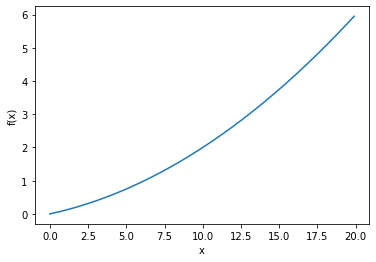

In [ ]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [ ]:
numerical_diff(function_1,5)

0.1999999999990898

In [ ]:
def function_2(x):
  return x[0]**2 + x[1]**2

In [ ]:
def function_tmp1(x0):
  return x0*x0 + 4.0**2.0

In [ ]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [ ]:
def function_tmp2(x1):
  return 3.0**2.0 + x1*x1

In [ ]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [ ]:
from numpy.lib.index_tricks import index_exp
def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x)

  for idx in range(x.size):
    # f(x+h)の計算
    tmp_val = x[idx]
    x[idx] = tmp_val + h
    fxh1 = f(x)
    # f(f-h)の計算
    x[idx] = tmp_val -h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val
  
  return grad

In [ ]:
def gradient_decent(f, init_x, lr=0.01, step_num=100):
  x = init_x

  for i in range(step_num):
    grad = numerical_gradient(f,x)
    x -= lr *grad
  
  return x

In [ ]:
def function_2(x):
  return x[0]**2 + x[1]**2

In [ ]:
init_x = np.array([-3.0, 4.0])
gradient_decent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [ ]:
init_x = np.array([-3.0, 4.0])
gradient_decent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [ ]:
import sys, os
sys.path.append(os.pardir)
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [ ]:
class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2,3)

  def predict(self, x):
    return np.dot(x, self.W)

  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)

    return loss

In [ ]:
net = simpleNet()
print(net.W)

[[-0.21323966  0.09397589  0.16633045]
 [ 0.74803699  0.58174817 -0.16942929]]


In [ ]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 0.5452895   0.57995889 -0.05268809]


In [ ]:
np.argmax(p)

1

In [ ]:
t = np.array([0, 0, 1])
net.loss(x, t)

1.5477800184833266

In [ ]:
def f(W):
  return net.loss(x, t)

In [ ]:
dW = numerical_gradient(f, net.W)
dW

array([[ 0.23209025,  0.24027778, -0.47236803],
       [ 0.34813537,  0.36041667, -0.70855204]])

In [ ]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

In [ ]:
from numpy.core.numeric import cross
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:

  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    # 重みの初期化
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

  # x:入力データ、t:教師データ
  def loss(self, x, t):
    y = self.predict(x)

    return cross_entropy_error(y, t)
    
  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)

    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy

  # x:入力データ、t:教師データ
  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x, t)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads
  
  def gradient(self, x, t):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']
    grads = {}
        
    batch_num = x.shape[0]
        
    # forward
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)
    
    # backward
    dy = (y - t) / batch_num
    grads['W2'] = np.dot(z1.T, dy)
    grads['b2'] = np.sum(dy, axis=0)
    
    dz1 = np.dot(dy, W2.T)
    da1 = sigmoid_grad(a1) * dz1
    grads['W1'] = np.dot(x.T, da1)
    grads['b1'] = np.sum(da1, axis=0)

    return grads

In [ ]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

#ハイパーパラメータ
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []
# １エポックあたりの繰り返し数
iter_per_epoch = max(train_size / batch_size,1)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
  # ミニバッチの取得
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  # 勾配の計算
  #grad = network.numerical_gradient(x_batch, t_batch)
  grad = network.gradient(x_batch, t_batch)

  # パラメータの更新
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  # 学習経過の記録
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

  # １エポック五のに認識精度を計算
  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    test_acc_list.append(test_acc)
    print("train acc, test acc | " + str(train_acc) + ", "+ str(test_acc))

train acc, test acc | 0.10441666666666667, 0.1028


In [ ]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

#ハイパーパラメータ
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
  # ミニバッチの取得
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  # 勾配の計算
  #grad = network.numerical_gradient(x_batch, t_batch)
  grad = network.gradient(x_batch, t_batch)

  # パラメータの更新
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  # 学習経過の記録
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

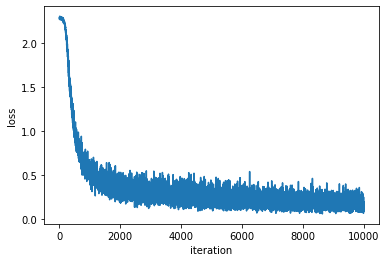

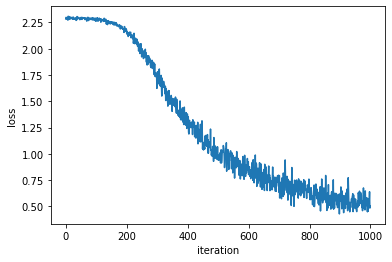

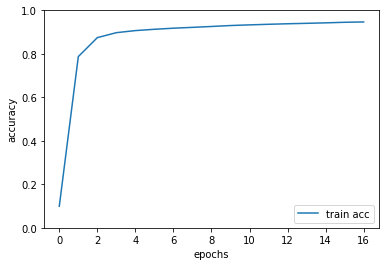

In [ ]:
# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(range(iters_num), train_loss_list)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.figure()

plt.plot(range(iters_num)[:1000], train_loss_list[:1000])
plt.xlabel("iteration")
plt.ylabel("loss")
plt.figure()

plt.plot(x, train_acc_list, label='train acc')
#plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()